In [24]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from scipy import stats
import matplotlib.pyplot as plt

Retrieving Data

In [3]:
xls = pd.ExcelFile("yelp data (1).xlsx")
data = pd.read_excel(xls, 'ice cream')
data = data[(data["state"] == "AZ") | (data["state"] == "WI")]
data

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,ZhO6_8Vc-zfRxvDDvDBynA,"""Nekter Juice Bar""",NaN,"""3440 East Baseline Rd, Ste 103""",Mesa,AZ,85204,33.379624,-111.755988,4.0,91,1,Acai Bowls;Ice Cream & Frozen Yogurt;Juice Bar...
1,uBj_DKha3DkQM48K8ZLfjg,"""Nekter Juice Bar""",NaN,"""9500 E Via De Ventura, Ste D-210""",Scottsdale,AZ,85256,33.554526,-111.876044,2.5,6,1,Acai Bowls;Juice Bars & Smoothies;Food;Ice Cre...
2,j0TFRTryKwNNC2PAIgaRZA,"""Nekter Juice Bar""",NaN,"""4041 S Gilbert Rd, Ste 2""",Chandler,AZ,85297,33.247562,-111.787808,5.0,13,1,Acai Bowls;Juice Bars & Smoothies;Ice Cream & ...
5,IJzt5dKeeYbHcHeJU3vjJQ,"""Top That Frozen Yogurt""",NaN,"""3870 W Happy Valley Rd, Ste 159""",Glendale,AZ,85310,33.713976,-112.142576,4.0,19,1,American (New);Restaurants;Ice Cream & Frozen ...
11,1r9xmPVZqsiTNQr_FAcs8w,"""Mary Coyle Ol' Fashion Ice Cream""",NaN,"""5823 N 7th St""",Phoenix,AZ,85014,33.522598,-112.064992,4.0,78,1,American (Traditional);Restaurants;Ice Cream &...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,MFEhYkbGVtMrU4oJwDEQfw,"""Water 2 Ice""",NaN,"""6340 S Rural Rd, Ste 112""",Tempe,AZ,85283,33.365140,-111.929254,5.0,3,1,Water Stores;Ice Cream & Frozen Yogurt;Food
2321,LnXRLBNEPw2BjRTqdij0hw,"""Water Mart""",NaN,"""4408 N Miller Rd""",Scottsdale,AZ,85251,33.501401,-111.919088,5.0,4,1,Water Stores;Ice Cream & Frozen Yogurt;Food;Sh...
2322,sf0jJlbHnGRIN0LnBeqk6w,"""Water Plus Water and ice""",NaN,"""1969 W Ray Rd""",Chandler,AZ,85224,33.318863,-111.875473,5.0,18,1,Water Stores;Ice Cream & Frozen Yogurt;Home Se...
2323,YST448LplxH6SMLNq2vsOw,"""Ambrosia Water & Ice Company""",NaN,"""500 N Estrella Pkwy, Ste B2""",Goodyear,AZ,85338,33.451662,-112.394524,4.0,7,1,Water Stores;Ice Cream & Frozen Yogurt;Shaved ...


B) Statistic Summaries

In [17]:
dataaz = data[data["state"] == "AZ"]
datawi = data[data["state"] == "WI"]

print("Arizona:")
print("Minimum: " + str(min(dataaz["stars"])))
print("Q1: " + str(np.quantile(dataaz["stars"], 0.25)))
print("Median: " + str(np.median(dataaz["stars"])))
print("Q3: " + str(np.quantile(dataaz["stars"], 0.75)))
print("Maximum: " + str(max(dataaz["stars"])))
print("IQR: " + str(np.quantile(dataaz["stars"], 0.75) - np.quantile(dataaz["stars"], 0.25)))
print()
print("Mean: " + str(round(np.mean(dataaz["stars"]),2)))
print("Standard Deviation: " + str(round(np.std(dataaz["stars"]),2)))
print("Variance: " + str(round(np.std(dataaz["stars"])**2,2)))
print()

print("Wisconsin:")
print("Minimum: " + str(min(datawi["stars"])))
print("Q1: " + str(np.quantile(datawi["stars"], 0.25)))
print("Median: " + str(np.median(datawi["stars"])))
print("Q3: " + str(np.quantile(datawi["stars"], 0.75)))
print("Maximum: " + str(max(datawi["stars"])))
print("IQR: " + str(np.quantile(datawi["stars"], 0.75) - np.quantile(datawi["stars"], 0.25)))
print()
print("Mean: " + str(round(np.mean(datawi["stars"]),2)))
print("Standard Deviation: " + str(round(np.std(datawi["stars"]),2)))
print("Variance: " + str(round(np.std(datawi["stars"])**2,2)))

Arizona:
Minimum: 1.0
Q1: 3.5
Median: 4.0
Q3: 4.5
Maximum: 5.0
IQR: 1.0

Mean: 3.78
Standard Deviation: 0.81
Variance: 0.65

Wisconsin:
Minimum: 1.0
Q1: 3.5
Median: 4.0
Q3: 4.5
Maximum: 5.0
IQR: 1.0

Mean: 3.81
Standard Deviation: 0.76
Variance: 0.57


C) Graphing

In [18]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x=dataaz["stars"], name = "Arizona"), row=1, col=1)
fig.add_trace(go.Histogram(x = datawi["stars"], name = "Wisconsin"), row=1, col=2)

fig.update_xaxes(title="Stars", row=1, col=1)
fig.update_xaxes(title="Stars", row=1, col=2)

fig.update_layout(title_text="Histogram Comparison of Ratings of Ice Cream Stores in Wisconsin and Arizona")

fig.show()

In [19]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Box(x = datawi["stars"], name = "Wisconsin"), row=1, col=1)
fig.add_trace(go.Box(x=dataaz["stars"], name = "Arizona"), row=1, col=1)
fig.update_xaxes(title = "Stars")
fig.update_layout(title = "Boxplot Comparison of Ratings of Ice Cream Stores")
fig.show()

D) Outlier Removed Statistics

In [20]:
dataaznew = data[data["state"] == "AZ"][data["stars"] >= 2]
datawinew = data[data["state"] == "WI"][data["stars"] >= 2]

print("Arizona:")
print("Minimum: " + str(min(dataaznew["stars"])))
print("Q1: " + str(np.quantile(dataaznew["stars"], 0.25)))
print("Median: " + str(np.median(dataaznew["stars"])))
print("Q3: " + str(np.quantile(dataaznew["stars"], 0.75)))
print("Maximum: " + str(max(dataaznew["stars"])))
print("IQR: " + str(np.quantile(dataaznew["stars"], 0.75) - np.quantile(dataaznew["stars"], 0.25)))
print()
print("Mean: " + str(round(np.mean(dataaznew["stars"]),2)))
print("Standard Deviation: " + str(round(np.std(dataaznew["stars"]),2)))
print("Variance: " + str(round(np.std(dataaznew["stars"])**2,2)))
print()

print("Wisconsin:")
print("Minimum: " + str(min(datawinew["stars"])))
print("Q1: " + str(np.quantile(datawinew["stars"], 0.25)))
print("Median: " + str(np.median(datawinew["stars"])))
print("Q3: " + str(np.quantile(datawinew["stars"], 0.75)))
print("Maximum: " + str(max(datawinew["stars"])))
print("IQR: " + str(np.quantile(datawinew["stars"], 0.75) - np.quantile(datawinew["stars"], 0.25)))
print()
print("Mean: " + str(round(np.mean(datawinew["stars"]),2)))
print("Standard Deviation: " + str(round(np.std(datawinew["stars"]),2)))
print("Variance: " + str(round(np.std(datawinew["stars"])**2,2)))

Arizona:
Minimum: 2.0
Q1: 3.5
Median: 4.0
Q3: 4.5
Maximum: 5.0
IQR: 1.0

Mean: 3.82
Standard Deviation: 0.75
Variance: 0.56

Wisconsin:
Minimum: 2.5
Q1: 3.5
Median: 4.0
Q3: 4.5
Maximum: 5.0
IQR: 1.0

Mean: 3.88
Standard Deviation: 0.64
Variance: 0.41


C:\Users\thewa\AppData\Local\Temp\ipykernel_27164\757228206.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\thewa\AppData\Local\Temp\ipykernel_27164\757228206.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



E) z-score transformation

In [22]:
az = dataaz["stars"]
wi = datawi["stars"]

azt = (az-3.63)/1.004
wit = (wi-3.63)/1.004

print("Arizona z-score mean: " + str(round(np.mean(azt), 2)))
print("Wisconsin z-score mean: " + str(round(np.mean(wit), 2)))

Arizona z-score mean: 0.15
Wisconsin z-score mean: 0.18


F) Normal Probability Plot

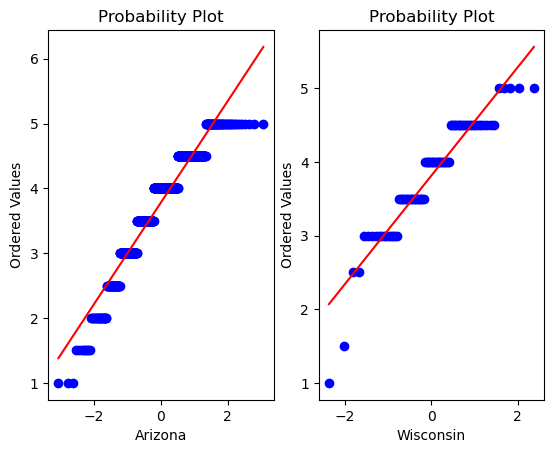

In [34]:
ax1 = plt.subplot(121)
res = stats.probplot(az, plot = plt)
ax1.set_xlabel("Arizona")


ax2 = plt.subplot(122)
res = stats.probplot(wi, plot = plt)
ax2.set_xlabel("Wisconsin")

plt.show()

G) brief summary

In [38]:
xls = pd.ExcelFile("yelp data (1).xlsx")
df = pd.read_excel(xls, 'ice cream')

In [39]:
print(np.median(df["stars"]))
print("IQR: " + str(np.quantile(df["stars"], 0.75) - np.quantile(df["stars"], 0.25)))


4.0
IQR: 1.0
